In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
import os

pd.set_option("display.max_columns",0)

df = pd.read_json(os.path.join("..","..","data","TA_User_Reviws_Korea_all.json"))
df.head()

,id,language,reviewStatus,title,helpfulVotes,createdDate,publishedDate,rating,text,photoIds,photos,userId,__typename,location.locationId,location.name,location.additionalNames.long,location.additionalNames.longOnlyParent,location.additionalNames.__typename,location.placeType,location.isGeo,location.parentGeoId,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,location.reviewSummary.__typename,location.thumbnail.id,location.thumbnail.photoSizes,location.thumbnail.__typename,location.parent.locationId,location.parent.parentGeoId,location.parent.name,location.parent.additionalNames.long,location.parent.additionalNames.__typename,location.parent.__typename,location.route.url,location.route.__typename,location.socialStatistics.isSaved,location.socialStatistics.__typename,location.__typename,userProfile.userId,userProfile.isMe,userProfile.isVerified,userProfile.displayName,userProfile.username,userProfile.contributionCounts.sumAllUgc,userProfile.contributionCounts.__typename,userProfile.avatar.id,userProfile.avatar.photoSizes,userProfile.avatar.__typename,userProfile.hometown.locationId,userProfile.hometown.fallbackString,userProfile.hometown.location,userProfile.hometown.__typename,userProfile.expertForums.generalForumIds,userProfile.expertForums.geoForumLocationIds,userProfile.expertForums.__typename,userProfile.route.url,userProfile.route.__typename,userProfile.__typename,userProfile.isFollowing,userProfile.followerCount,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked,socialStatistics.isBoosted,socialStatistics.boostCount,socialStatistics.likeCount,socialStatistics.isReposted,socialStatistics.repostCount,socialStatistics.isSaved,socialStatistics.tripCount,socialStatistics.__typename,route.url,route.__typename,tripInfo.stayDate,tripInfo.__typename,userProfile.hometown.location.locationId,userProfile.hometown.location.name,userProfile.hometown.location.additionalNames.long,userProfile.hometown.location.additionalNames.__typename,userProfile.hometown.location.parent.locationId,userProfile.hometown.location.parent.name,userProfile.hometown.location.parent.__typename,userProfile.hometown.location.__typename,tripInfo,location.thumbnail,route,location.route,userProfile.route,location.reviewSummary,location.parent,userProfile.hometown.location.parent,userProfile.contributionCounts,location,userProfile.avatar
0,748454819,en,PUBLISHED,Great Hotel,0,2020-03-01,2020-03-01,5,I really enjoyed our stay here in Gracery Hote...,[453807126],"[{'id': 453807126, 'title': None, 'description...",F9AD0C1F6409A1574AD0AFC237D2A4CE,Review,14159911,Hotel Gracery Seoul,"Hotel Gracery Seoul, South Korea",South Korea,AdditionalNames,ACCOMMODATION,False,294197,86.0,4.0,14159911.0,LocationReviewSummary,361115988.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Hotel_Review-g294197-d14159911-Reviews-Hotel_...,LocationDetailRoute,False,SocialStatistics,LocationInformation,F9AD0C1F6409A1574AD0AFC237D2A4CE,False,False,nataliea328,nataliea328,7,ContributionCounts,452388042.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,NaN,None,NaN,MemberLocation,[],[],ExpertForums,/Profile/nataliea328,MemberProfileRoute,MemberProfile,0.0,0.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d14159911-r748454819-...,ShowUserReviewRoute,2020-02-29,TripInfo,NaN,None,None,None,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,744980685,en,PUBLISHED,Vibrant and Trendy,0,2020-02-14,2020-02-13,5,This is a place for you to laidback and have s...,[],[],23EF5413495FF530151DB7E5C0FEF38D,Review,1958940,Hongik University Street,"Hongik University Street, South Korea",South Korea,AdditionalNames,ATTRACTION,False,294197,2256.0,4.5,1958940.0,LocationReviewSummary,38633900.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",Additiona

In [20]:
df.shape

(37197, 95)

In [5]:
df[(df['location.parent.additionalNames.long'] == "Seoul, South Korea") & (df['location.placeType'] == "EATERY")].pivot_table('rating', 'location.locationId', "userId")

userId,00150C8ACD87B7A3A54497D923CB3358,001A7245FAAB8EA12D7326F5F4E39BCA,002660C3C4BC9DF1527402FBEBC8225A,005E491A916F4CB0B4E6FDF46A812B16,0060FA49D122AC463D1B47EB3DEC0ACE,00A8873A27C32540588978DDC1D24AEA,00B33EB4F589E28550D7C33323D4E852,00B51AE5E8C5033FAD4963DA8E5E9837,0133E1D87572598C58DFC7CC55033EBF,013D887DD8E46B187786375EEC615081,016DCAFA7875B47AF2B4A0376D8AEE49,019F76FB037B54904E7179FEC1A9343E,01ABBC242589182128A1AE71EF46BAEE,01B8DCB67931CD0AEA63929F0E603E94,01C82A5294EC73F0A9966FB94C654CCF,01CC418CD41E7B79CDE29677D40A467B,01D4A1068664192D92CA2E59AE9EA6F4,01D889A8E837CB4E59AEF0A9407A833A,0235ED24FE1E60F828287A43FED91198,023668FA9B01FD762C5135D0DF068944,0254EAE8B193E0BA180F2D2E113B88C8,02F56C41C4FE1AA0E89A34C02825D6F7,031C7879ACD15FE775BC25E17226920D,03322C9A4AF884A247403000B78861E8,03B0B0678DF39FE1A81F1B3E4A114D6B,03C73BF29A57E4B77EB7378A3F7254CC,0464858EDE9FF88FDB45D61712D8B550,048DB111F389BCCC1D2962276A7037E9,04A9BBF67050A70B03C5F74D3C288947,05C430E8DC75F49CB7427FBD88A6E0CF,0605B0A7DAA5CB66CCC25410EB36B4D2,062BE1D61C066CB865F2D85D97D731AB,06893883A951DD41C79843A2F77A2ED3,06CEF740DE629183190B9EC96C902F49,06D55ABBC7FC1512EF79CA128DD57D66,06F5E7CCD84B3B9259880FC974B795B9,0702B26DC8F55AE85913F9F1F3424D80,073C1A4F61D70C1EB2CE55A9BDB78D3F,07663F99047227B0FC049018463CC954,090F5044C8CE72D37ECD6702B7741E6C,094BEB46392C929AB4804D316DD38479,09A0CCB529591AE65C934F4AEA8CF082,09A997B8318C195F492E35EA940BCF39,09C0F87EFD9A72B1F4E13128E4600FB1,09E917E9D02678294FFBCE1830066A2D,0A702E58F3F5E81ADB3FBEF9BC339897,0A762921F8F05E2E643EA80A8AC942A8,0ACA9CC048E4C4B6A82F524857925347,0ACF885A572C2BE29A7F427193F09CE5,0AF5461B211CE6200DC69BA5BF7987CE,0AFD802DC38D4F4E7F692E8164797A44,0B14FE060E2988EE26B92FC12562410C,0B2326380ADE6F7AED836AD430608F50,0B4E727AB129336052C1ACE515E15A2A,...,F0C2DB2B9F7B2C44A77E7CE43B0DB168,F0D538E228F676D5DB85FD142C13A7BF,F188B6305C182EC38F308A7BE9C7ADB1,F1FF15B23AFBE2B3F449C4F3603C7DC3,F2420E478EFA666000739A06199A15CF,F2F2DE6A1E359FA49106F946791AA429,F31C3BAE023E5029CE483A5C1EA75748,F376A180FAC9E7C85F497A1C6EBC1471,F38DC00FB737B3BD05A5B9AD03A715E8,F45C7283B16C1E6B0D3178C475E40306,F4AF9C44D60FC4FD4AB142E3D91C4A11,F4B119AD4E933DA7FA5B38395AAFEDFD,F4B61C347B8FED24F0F73FDFF1AC0825,F520FE193418596EC46F55619624EED7,F5836D8C6A612629DFDCC66A14A5DE4B,F600275BB00786554F35A0D215C694B1,F664E446398CD7D6382078AE5ABFFC87,F67EC4DA4EBB47D1092626AD20E34617,F6C0131C75F2B7759CF2D1C252D7E3D4,F6D0411D82F616388CAF4B5F10C28CA1,F71C20E99DEF18133B7B3C496669D679,F724839DB8C1400236D35251BA6B9516,F7517396A27206A98CDC971069DFBA51,F7EB4E5B708A07F23D20F219E03A4605,F845F636CA0A56FC128F7672AF6947EA,F848F0BF74B7D062CA833A8309C02A59,F84DE8AB12A6F29BB2C7DB122DE4782D,F85096E427586BCDE6B9942F029099BA,F858748084F8B1041359E2F656E3F8F0,F8588C07163C056A85FAA0B478226E07,F8C18CF58CAFC4867BB515FFB663D878,F96693B0530F7EFD7DEE0AFF4262B6D8,FA520A252BA08D5D4D2EAA05584288D2,FA550C0A7124974E0957B2D408CF50EE,FACBBF37EAC75E4D38358F1A53AB045E,FB7FCEEC3FD5BC604A48CC5EBF6E0B3A,FB8367860842EA242DEFC01E15795792,FBCE124EC10A1867DC6E3E04182F58D9,FC3630731EF7F60FA75F70E2ECCE2159,FC8399775A68F1705CFB76305676E9A8,FCA9D1DB75037E1BDCB6422E27D27196,FCF2E9F61F34EBEA0C905D0038B03C78,FD4E32F9A418B5476E8F27E3B33F69A8,FD68CB3C68C42BE63036F2BA31ECD91C,FD6E88A69B09E7085E0355B936EF27F1,FDCBDCCE742F09AAD83CB28AF5A26AD8,FE62F0771FF9A5BAAE0C81EE003AAFB3,FE7C22EA5D62CA5BE26BB32B2EE31C8F,FEABF84AF58497B4BC1F7C3F8AD4E208,FEFBC3B82459AF7B687F52E23E81D196,FF0C2856D0628E323AD9899570172827,FF602C18BA4EFA253AF9E2D37331B44D,FF815B8B86FAFDB6B07F0C0CA9DDA4AB,FFB61B1A83604683BDBFF68D444F304C
location.locationId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
776544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
df_seoul_eat = df[(df['location.parent.additionalNames.long'] == "Seoul, South Korea") & (df['location.placeType'] == "EATERY")]

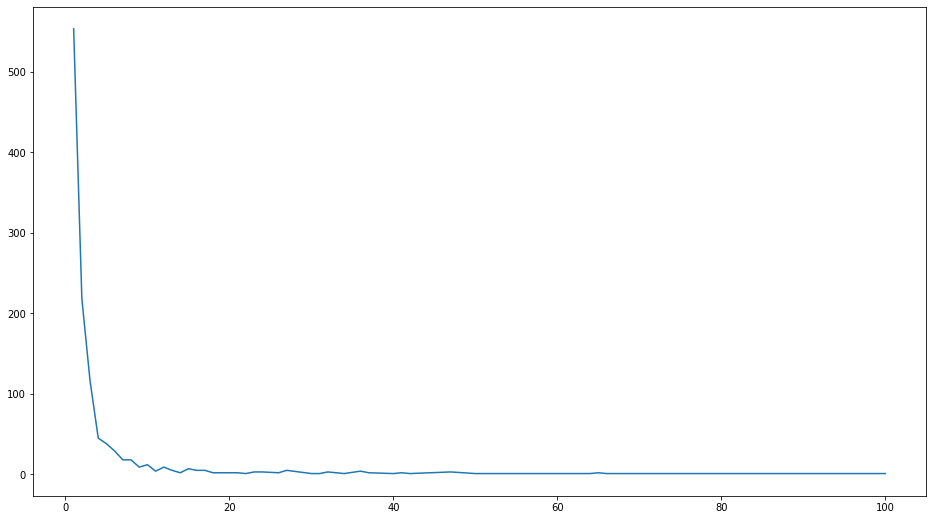

In [18]:
df_seoul_eat["userId"].value_counts().reset_index()['userId'].value_counts().sort_index()[:50].plot(figsize=(16,9))

In [19]:
df["userId"].value_counts().reset_index()['userId'].value_counts().sort_index()[:50]

1     4087
2     1075
3      617
4      364
5      275
6      193
7      162
8      114
9       91
10      78
11      69
12      44
13      30
14      36
15      33
16      24
17      16
18      22
19      20
20      12
21      18
22       8
23      16
24      13
25      13
26       8
27       4
28       8
29       1
30       7
31       2
32       7
33       4
34       5
35       3
36       5
37       4
38       7
39       3
40       3
41       5
42       3
43       4
44       4
45       3
46       2
47       2
48       2
49       3
50       2
Name: userId, dtype: int64

In [16]:
seoul_eatery_location_ids = df[(df['location.parent.additionalNames.long'] == "Seoul, South Korea") & (df['location.placeType'] == "EATERY")]['location.route.url'].unique()

In [18]:
for i, url in enumerate(seoul_eatery_location_ids):
    PAGE_URL = "https://www.tripadvisor.co.kr" + url
    res = requests.get(PAGE_URL)
    break

In [19]:
soup = BeautifulSoup(res.text,'html.parser')